<a href="https://colab.research.google.com/github/mshahr29/FDA/blob/main/Logistic_Regression_Simply_Applied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**

In [3]:
# pandas for Data Preprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# sklearn is a machine learning library that provides functions to build models
# StandardScaler is used to scale the data (important for KNN)
from sklearn.preprocessing import StandardScaler

# KNeighborsClassifier is the KNN model itself
from sklearn.neighbors import KNeighborsClassifier

# train_test_split is used to split the data into training and testing sets
from sklearn.model_selection import train_test_split # used to train the model

# Accuracy and other metrics to evaluate the model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

## **Data PreProcessing**

In [ ]:
# Load Dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv('Dataset 4.csv')  # Adjust filename if needed



Saving Dataset 4.csv to Dataset 4.csv


In [ ]:
# finding dimensions of dataset
df.shape

(10000, 12)

In [ ]:
# printing first few rows of dataset
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,15647311,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,15619304,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,15701354,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,NaN,0
4,15737888,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0


In [ ]:
# about data and its types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      9988 non-null   float64
 2   country           9992 non-null   object 
 3   gender            9991 non-null   object 
 4   age               9985 non-null   float64
 5   tenure            9993 non-null   float64
 6   balance           9991 non-null   float64
 7   products_number   9986 non-null   float64
 8   credit_card       9989 non-null   float64
 9   active_member     9990 non-null   float64
 10  estimated_salary  9995 non-null   float64
 11  churn             10000 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 937.6+ KB


In [ ]:
# statistical details of data
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,9988.000000,9985.000000,9993.000000,9991.000000,9986.000000,9989.000000,9990.000000,9995.000000,10000.000000
mean,1.569094e+07,650.498598,38.922684,5.013610,76483.692115,1.530142,0.705876,0.515415,100069.062518,0.203700
std,7.193619e+04,96.679213,10.481365,2.892561,62388.398514,0.581593,0.455671,0.499787,57510.333893,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50973.585000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97188.620000,1.000000,1.000000,1.000000,100183.050000,0.000000
75%,1.575323e+07,717.250000,44.000000,8.000000,127638.135000,2.000000,1.000000,1.000000,149382.875000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


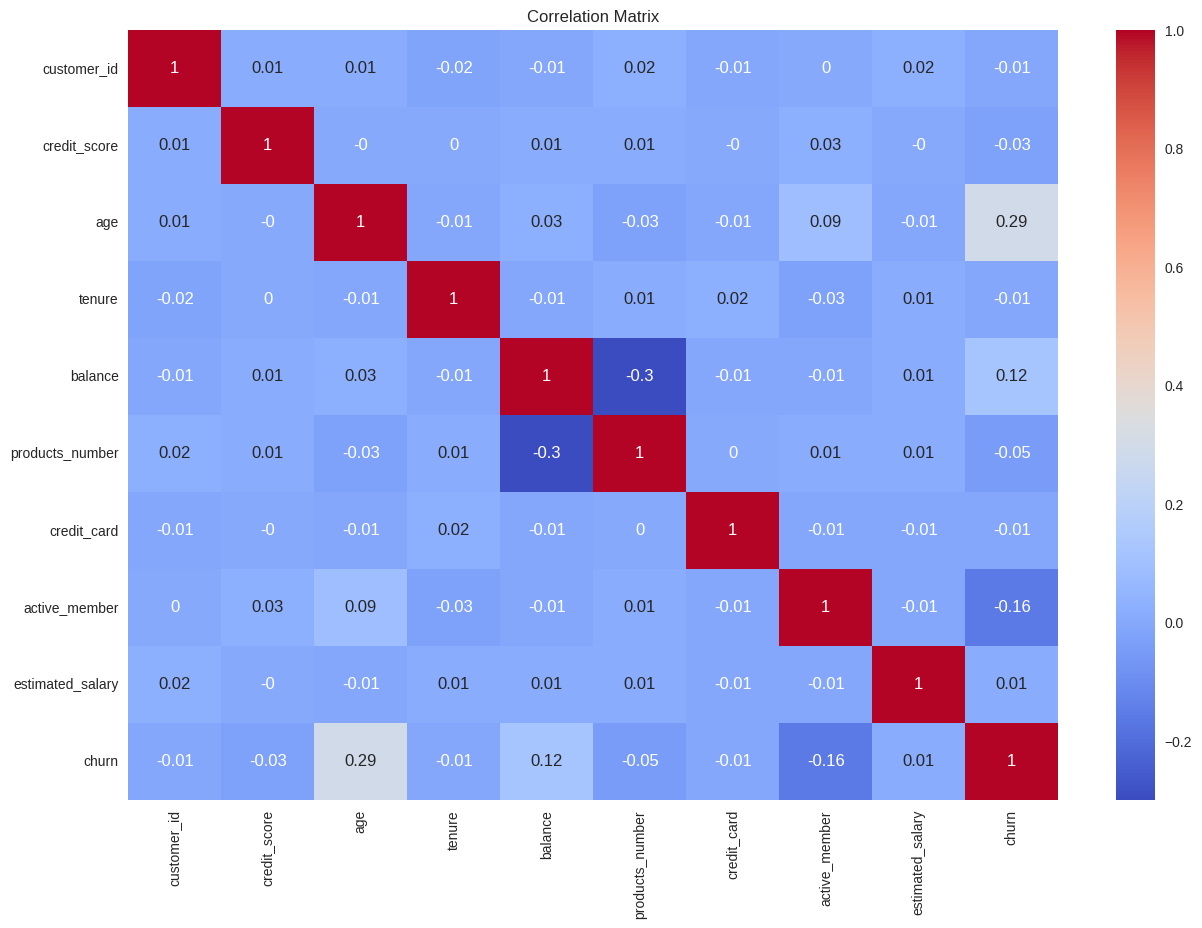

In [ ]:
# Select only numeric columns for correlation
numeric_data = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_data.corr().round(2)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


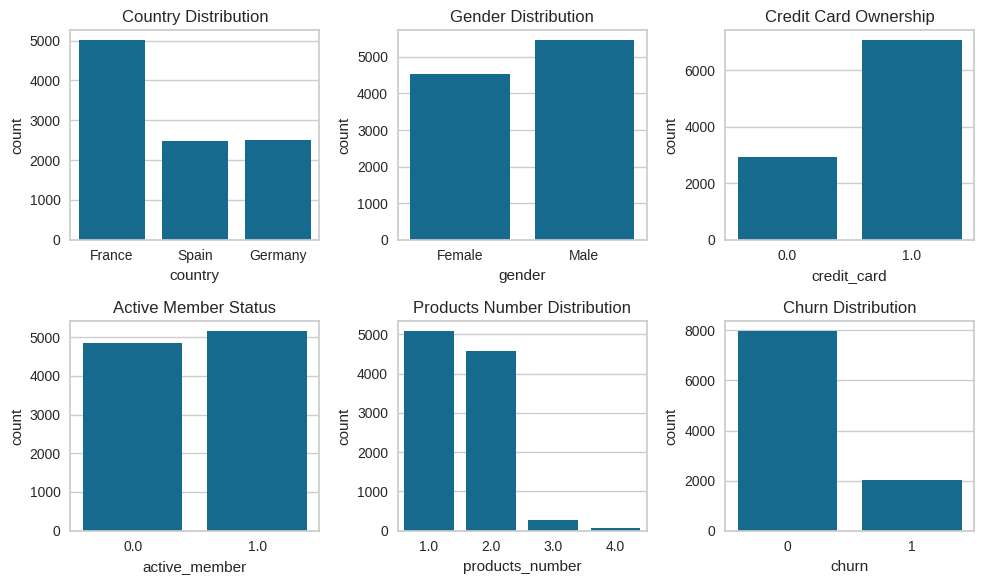

In [ ]:


# Countplot for categorical variables
plt.figure(figsize=(10, 6))

# Country
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='country')
plt.title('Country Distribution')

# Gender
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')

# Credit Card Ownership
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='credit_card')
plt.title('Credit Card Ownership')

# Active Membership
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='active_member')
plt.title('Active Member Status')

# Products Number
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='products_number')
plt.title('Products Number Distribution')

# Churn (Target Variable)
plt.subplot(2, 3, 6)
sns.countplot(data=df, x='churn')
plt.title('Churn Distribution')





plt.tight_layout()
plt.show()


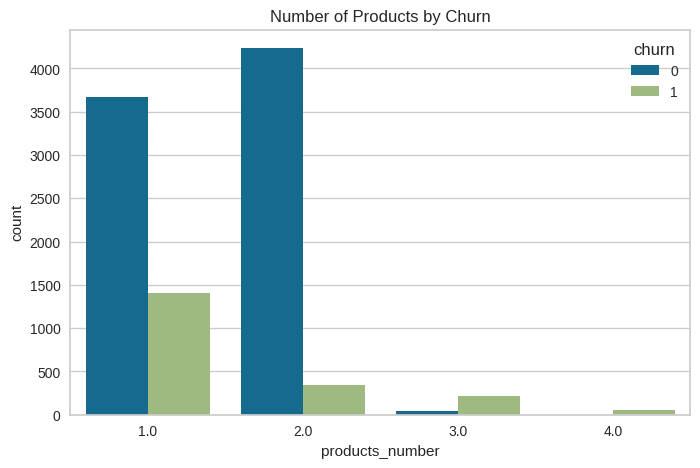

In [ ]:
#countplot of products_number alongside customer churn
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='products_number', hue='churn')
plt.title('Number of Products by Churn')
plt.show()

# --> shows more customers churn having just 1 product while most customers that doesn't churn had 2 products

### Converting Gender to binary and Country to dummy feature


## **One-Hot Encoding**


One-Hot Encoding is a technique used to convert categorical variables into numerical form by creating binary columns for each category. It assigns a 1 or 0 to indicate the presence or absence of a category in a feature. This method prevents models from misinterpreting categorical data as ordinal.


In [ ]:
# maps gender to binary values 1 and 0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619.0,France,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,15647311,608.0,Spain,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,15619304,502.0,France,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,15701354,699.0,France,0.0,39.0,1.0,0.00,2.0,0.0,0.0,NaN,0
4,15737888,850.0,Spain,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0


In [ ]:
# extracts 2 variables while making one as refrence. drops Frnace one as dummy/refrence
df = pd.get_dummies(df, columns=['country'], drop_first=True)

df['country_Germany'] = df['country_Germany'].map({True: 1, False: 0}).fillna(0)
df['country_Spain'] = df['country_Spain'].map({True: 1, False: 0}).fillna(0)

# Display the first few rows of the updated DataFrame
print(df.head())

   customer_id  credit_score  gender   age  tenure    balance  \
0     15634602         619.0     0.0  42.0     2.0       0.00   
1     15647311         608.0     0.0  41.0     1.0   83807.86   
2     15619304         502.0     0.0  42.0     8.0  159660.80   
3     15701354         699.0     0.0  39.0     1.0       0.00   
4     15737888         850.0     0.0  43.0     2.0  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  \
0              1.0          1.0            1.0         101348.88      1   
1              1.0          0.0            1.0         112542.58      0   
2              3.0          1.0            0.0         113931.57      1   
3              2.0          0.0            0.0               NaN      0   
4              1.0          1.0            1.0          79084.10      0   

   country_Germany  country_Spain  
0                0              0  
1                0              1  
2                0              0  
3             

### Checking for Duplicates

In [ ]:
# Looking for Duplicate Rows
duplicate_rows_df=df[df.duplicated()]
print("No. of Duplicate rows", duplicate_rows_df.shape)
df.duplicated().sum()

No. of Duplicate rows (0, 13)


0

In [ ]:
df.count()

,0
customer_id,10000
credit_score,9988
gender,9991
age,9985
tenure,9993
balance,9991
products_number,9986
credit_card,9989
active_member,9990
estimated_salary,9995


### Checking For Outliers Value

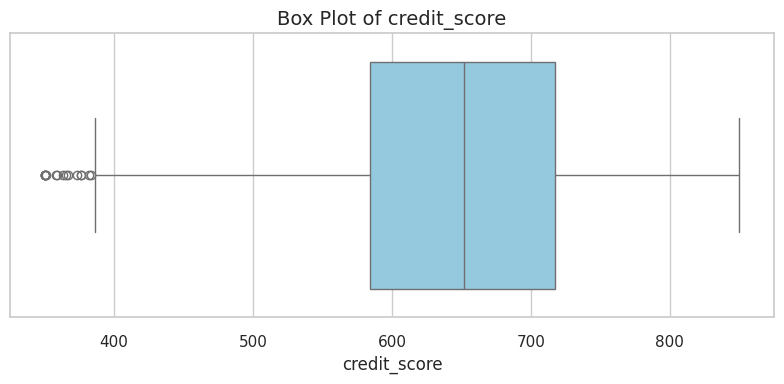

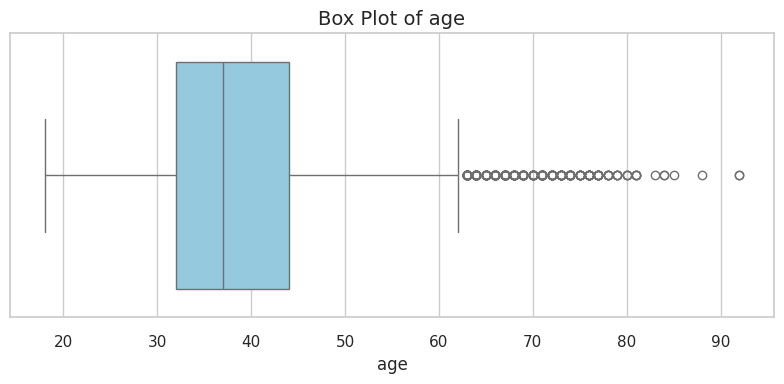

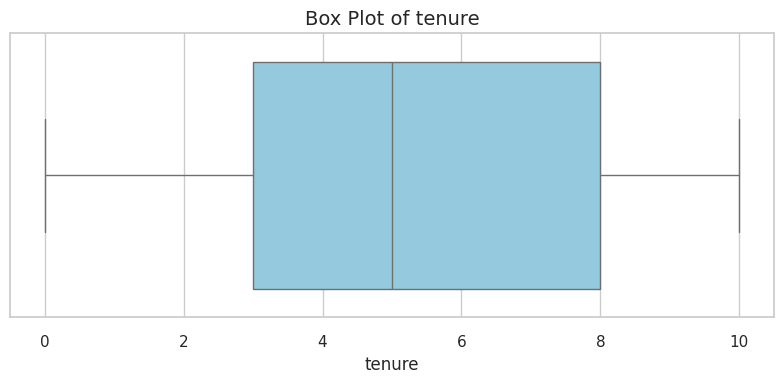

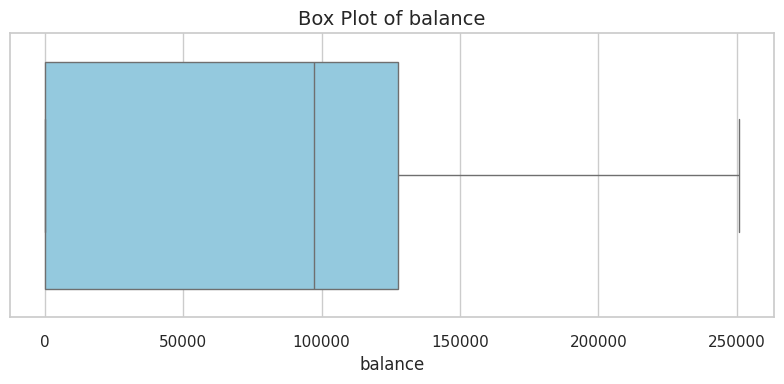

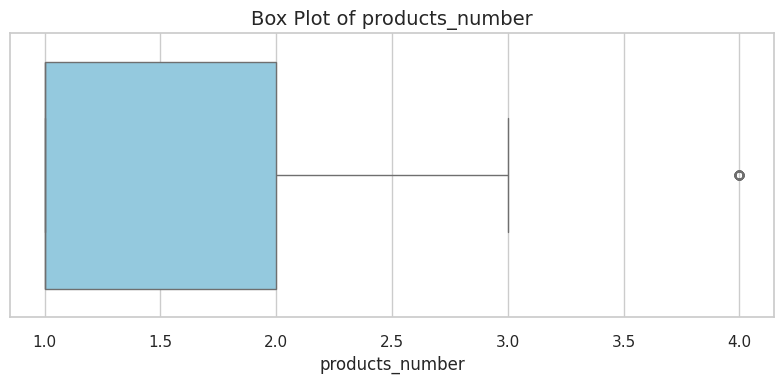

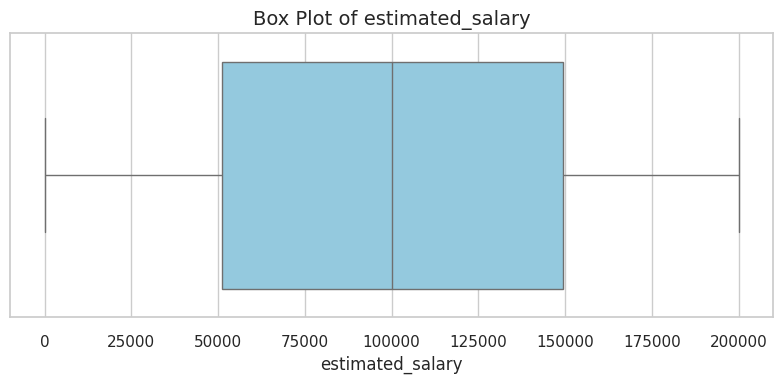

In [ ]:
sns.set_palette("deep")  # setting  pallete
sns.set(style="whitegrid")  # Set the style of the grid

# List of columns to plot
col = ['credit_score',  'age', 'tenure',
       'balance', 'products_number',  'estimated_salary']

# Loop through each column and create a box plot
for i in col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[i], color="skyblue")  # Adjust color here as needed
    plt.title(f'Box Plot of {i}', fontsize=14)  # Add title with larger font
    plt.xlabel(i, fontsize=12)  # Add x-axis label
    plt.tight_layout()  # Ensure layout is neat
    plt.show()


In [ ]:
df.shape

(10000, 13)

### We are applying logistic regression model without

- Outlier Treatment
- Replacing Missing Values with suitable ones
- Dropping Unnecessary Features
- Standard Scaling
- Class Balancing

## **Logistic Regression**

## Model Building

### Dropping Features

In [ ]:
# dropping customer_id
df = df.drop(['customer_id'], axis = 1)


In [ ]:
# separating churn from other variables to set up regression.
X = df.drop('churn', axis = 1)
X = X.values
y = df['churn']

In [ ]:
# dividing data into train and test data with test size 30% with random_state keeping results consistent everytime  code is run
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# checking dimensions of train/test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 11)
(7000,)
(3000, 11)
(3000,)


In [ ]:
import numpy as np

# Replace NaNs with the column-wise mean
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_train))  # Use training mean


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression model
log_reg = LogisticRegression()

# Train the model on training data
log_reg.fit(X_train, y_train)

# Predict the test set results
y_pred = log_reg.predict(X_test)

print(y_pred)
print(y_pred.shape)

[0 0 0 ... 0 0 0]
(3000,)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#probablities
probablities = log_reg.predict_proba(X_test)

for i in range(len(y_test)):
    print(probablities[i], '-->', y_pred[i])

[0.74119118 0.25880882] --> 0
[0.83400928 0.16599072] --> 0
[0.81275757 0.18724243] --> 0
[0.70891332 0.29108668] --> 0
[0.71784001 0.28215999] --> 0
[0.88167645 0.11832355] --> 0
[0.63480743 0.36519257] --> 0
[0.7439469 0.2560531] --> 0
[0.75922151 0.24077849] --> 0
[0.71486765 0.28513235] --> 0
[0.78697232 0.21302768] --> 0
[0.83374772 0.16625228] --> 0
[0.89929026 0.10070974] --> 0
[0.76165666 0.23834334] --> 0
[0.76633743 0.23366257] --> 0
[0.75476751 0.24523249] --> 0
[0.79833739 0.20166261] --> 0
[0.6255126 0.3744874] --> 0
[0.84029808 0.15970192] --> 0
[0.81801423 0.18198577] --> 0
[0.83880539 0.16119461] --> 0
[0.86154804 0.13845196] --> 0
[0.8477575 0.1522425] --> 0
[0.85242328 0.14757672] --> 0
[0.87069305 0.12930695] --> 0
[0.68322596 0.31677404] --> 0
[0.6971819 0.3028181] --> 0
[0.80399701 0.19600299] --> 0
[0.83718472 0.16281528] --> 0
[0.66682982 0.33317018] --> 0
[0.73934828 0.26065172] --> 0
[0.87521835 0.12478165] --> 0
[0.70288477 0.29711523] --> 0
[0.7916226 0.20837

0.8053333333333333

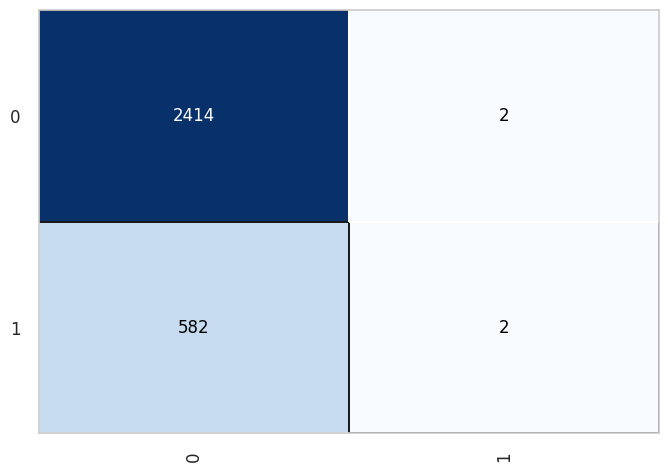

In [ ]:
# confusion matrix
cm = ConfusionMatrix(log_reg, cmap='Blues')
cm.fit(X_train, y_train)
cm.score(X_test, y_test)



In [ ]:
logistic_normal = (classification_report(y_test, y_pred))
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.50      0.00      0.01       584

    accuracy                           0.81      3000
   macro avg       0.65      0.50      0.45      3000
weighted avg       0.75      0.81      0.72      3000



In [ ]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8053333333333333


Feature engineering is the process of selecting, modifying, or creating new features (input variables) from raw data to improve the performance of machine learning models. The goal is to make the data more informative and relevant to the model, allowing it to make better predictions or classifications.

It typically involves tasks like:

Feature Selection: Choosing the most important features that contribute to the target variable and discarding irrelevant ones.
Feature Transformation: Applying mathematical operations to scale, normalize, or encode features (e.g., converting categorical data into numerical form).
Feature Creation: Generating new features by combining or transforming existing features (e.g., creating a "total spending" feature from individual spending categories).
Handling Missing Data: Filling in missing values with imputation or other techniques to avoid errors in model training.
The better the feature engineering, the more effective the model can be in learning patterns from the data.